# Limpieza y preprocesamiento de datos

## ¿Qué es limpieza de datos?

La _limpieza de datos_ es el proceso de identificar y corregir (o eliminar) errores y inconsistencias en los datos para mejorar su calidad.

Incluye tareas como:

* Manejo de valores faltantes
* Remover valores duplicados
* Corregir valores erróneos o inconsistentes
* Estandarizar formatos
* Manejo de valores atípicos (outliers)

## ¿Qué es preprocesamiento de datos?

El _preprocesamiento de datos_ es el proceso de transformar y preparar los datos brutos para que sean adecuados para el análisis o modelado.

Incluye tareas como:

* Escalado y normalización de datos
* Codificación de variables categóricas
* Reducción de dimensionalidad
* Separar data en train/test

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.pclass.unique() #class

array([3, 1, 2])

##### 🔹 Conocer el tipo de variable y valores

| variable      | tipo de variable                     | descripción breve                                      | ejemplos de valores |
|---------------|--------------------------------------|--------------------------------------------------------|---------------------|
| survived      | cualitativa dicotómica (binaria)     | indica si sobrevivió (1) o no (0)                      | `0`, `1` |
| pclass        | cualitativa ordinal                  | clase del pasajero (nivel socioeconómico)              | `1`, `2`, `3` |
| sex           | cualitativa nominal                  | sexo biológico del pasajero                            | `"male"`, `"female"` |
| age           | cuantitativa continua (ratio)        | edad en años                                           | `22.0`, `35.0`, `nan` |
| sibsp         | cuantitativa discreta                | número de hermanos/esposos a bordo                     | `0`, `1`, `3` |
| parch         | cuantitativa discreta                | número de padres/hijos a bordo                         | `0`, `1`, `2` |
| fare          | cuantitativa continua (ratio)        | tarifa pagada                                          | `7.25`, `71.28`, `512.33` |
| embarked      | cualitativa nominal                  | puerto de embarque (c, q, s)                           | `"s"`, `"c"`, `"q"` |
| class         | cualitativa ordinal (categoría)      | clase en texto                                         | `"first"`, `"second"`, `"third"` |
| who           | cualitativa nominal                  | tipo de persona                                        | `"man"`, `"woman"`, `"child"` |
| adult_male    | cualitativa dicotómica (binaria)     | indica si es hombre adulto                             | `True`, `False` |
| deck          | cualitativa nominal (muchos nulos)   | letra de la cubierta                                   | `"c"`, `"e"`, `nan` |
| embark_town   | cualitativa nominal                  | ciudad de embarque                                     | `"southampton"`, `"cherbourg"`, `"queenstown"` |
| alive         | cualitativa dicotómica (binaria)     | estado de supervivencia en texto                       | `"yes"`, `"no"` |
| alone         | cualitativa dicotómica (binaria)     | indica si viajaba solo                                 | `True`, `False` |



## Comencemos por la limpieza de datos

##### 🔹Valores faltantes

In [6]:
# Valores faltantes
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Cuando tenemos valores faltantes en un dataset, podemos manejarlos de varias maneras:

* Eliminar filas o columnas con valores faltantes
* Imputar valores faltantes con la media, mediana o moda
* Usar modelos predictivos para estimar los valores faltantes

**OJO**: **Nunca debemos imputar valores faltantes con la media, mediana o moda sin antes analizar si la variable tiene una distribución normal o sesgada. También es importante considerar que este paso requiere su debida atención, ya que puede introducir sesgos en el análisis.**

In [7]:
# Ejemplo: Imputar variable "Age" condicionada a "Pclass" y "Sex"

age_median = df.groupby(['pclass', 'sex'])['age'].median()
age_median

pclass  sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: age, dtype: float64

In [8]:
def impute_age(row):
    if pd.isna(row["age"]):
        return age_median.loc[row["pclass"], row["sex"]]
    return row["age"]

In [9]:
df["age"] = df.apply(impute_age, axis=1)

In [10]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

_¿Qué piensas del siguiente ejemplo? ¿Lo imputarías de esta manera?_

In [ ]:
# Imputar por moda
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

##### 🔹 Valores duplicados

In [12]:
# Valores duplicados
df.duplicated().sum()

np.int64(113)

Cuando trabajamos con `.duplicate()` podemos encontrar filas duplicadas en un DataFrame.

```python
   Nombre  Edad
0     Ana    25
1    Luis    30
2     Ana    25
3  Carlos    40

0    False
1    False
2     True   <- duplicado de la fila 0
3    False
dtype: bool

1   <- hay un duplicado
```

A menos que podamos justificar la presencia de filas duplicadas, generalmente es una buena práctica eliminarlas para evitar sesgos en el análisis.

In [13]:
# Eliminar duplicados
df = df.drop_duplicates()

##### 🔹 Estandarizar formatos

In [14]:
df["sex"] = df["sex"].str.lower()  
df["embarked"] = df["embarked"].str.upper()

##### 🔹Tratar _outliers_

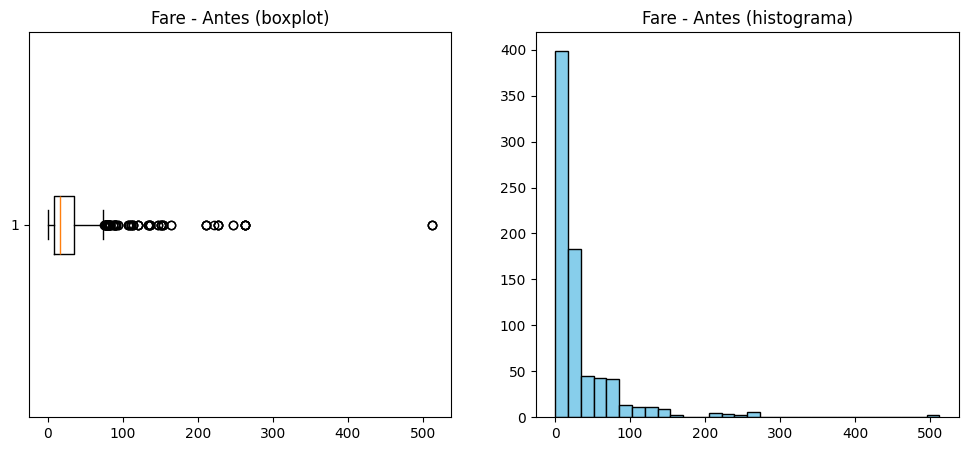

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Boxplot
ax[0].boxplot(df["fare"], vert=False)
ax[0].set_title("Fare - Antes (boxplot)")

# Histograma
ax[1].hist(df["fare"], bins=30, color="skyblue", edgecolor="black")
ax[1].set_title("Fare - Antes (histograma)")

plt.show()

In [16]:
# Calcular los límites con IQR
Q1 = df["fare"].quantile(0.25)   # primer cuartil (25%)
Q3 = df["fare"].quantile(0.75)   # tercer cuartil (75%)
IQR = Q3 - Q1                    # rango intercuartílico

lower = Q1 - 1.5 * IQR            # límite inferior
upper = Q3 + 1.5 * IQR            # límite superior

print(f"Límite inferior: {lower:.2f}")
print(f"Límite superior: {upper:.2f}")

Límite inferior: -31.44
Límite superior: 73.86


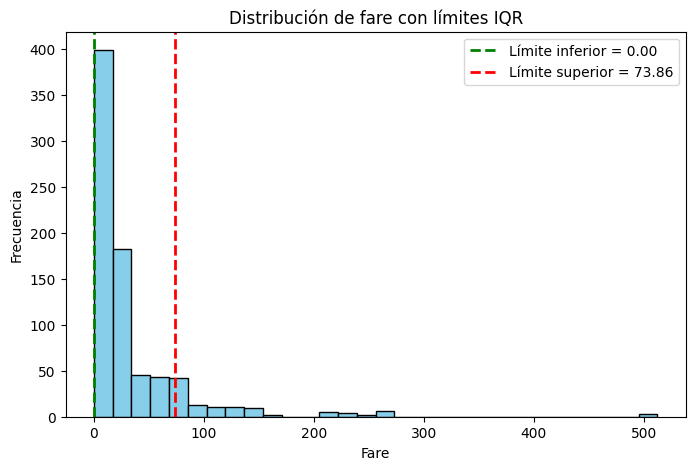

In [19]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(df["fare"], bins=30, color="skyblue", edgecolor="black")
ax.axvline(lower, color="green", linestyle="--", linewidth=2, label=f"Límite inferior = {lower:.2f}")
ax.axvline(upper, color="red", linestyle="--", linewidth=2, label=f"Límite superior = {upper:.2f}")

ax.set_title("Distribución de fare con límites IQR")
ax.set_xlabel("Fare")
ax.set_ylabel("Frecuencia")
ax.legend()

plt.show()

In [17]:
# Corrección
lower = max(0, Q1 - 1.5*IQR)  # el mínimo lógico es 0
print(f"Límite inferior: {lower:.2f}")

Límite inferior: 0.00


In [20]:
# Reemplaza valores 
df["fare"] = df["fare"].clip(lower, upper)

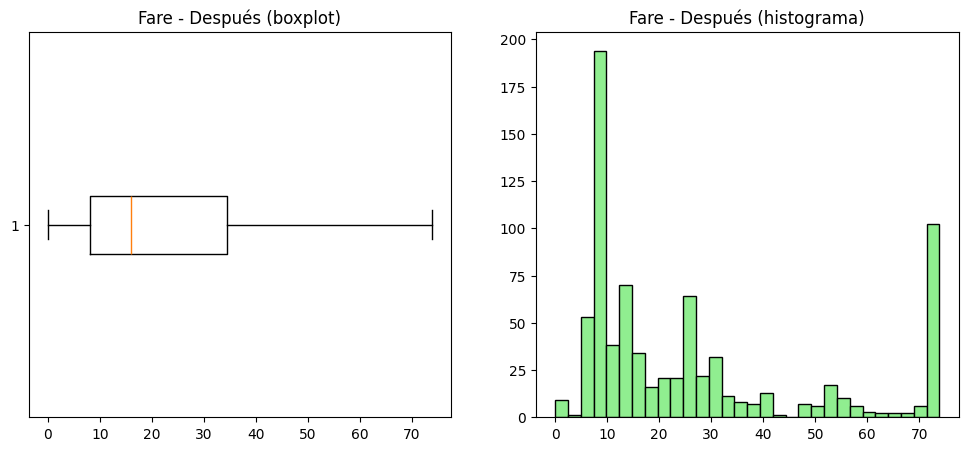

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].boxplot(df["fare"], vert=False)
ax[0].set_title("Fare - Después (boxplot)")

ax[1].hist(df["fare"], bins=30, color="lightgreen", edgecolor="black")
ax[1].set_title("Fare - Después (histograma)")

plt.show()

**OJO: La forma de manejar los _outliers_ depende del contexto y del análisis que se vaya a realizar. No existe una única solución correcta.**

## Sigamos con el preprocesamiento de datos

El preprocesamiento de datos **no es un conjunto de pasos fijos**, sino que depende de:

1. **El algoritmo de Machine Learning que vamos a usar**  
   - Algunos algoritmos **son sensibles a la escala** (ej: regresión logística, SVM, KNN, redes neuronales).  
     → Necesitan escalado o normalización.  
   - Otros algoritmos **no lo necesitan** (ej: árboles de decisión, random forest, gradient boosting).  
     → Pueden trabajar con variables en distintas escalas sin problema.

2. **El tipo de problema**  
   - Si tengo muchas variables categóricas con muchas categorías → One-Hot Encoding puede generar demasiadas columnas, mejor usar *target encoding* o *embeddings*.  
   - Si el dataset tiene muchas variables correlacionadas → PCA u otra técnica de reducción de dimensionalidad puede ser útil.  

3. **El objetivo final**  
   - Predecir con máxima precisión.  
   - Hacer un modelo interpretable.  
   - Reducir tiempo de cómputo.  

En este sentido, y para que el ejemplo sea más real, supongamos que nos plantemos lo siguiente:

_Podemos predicir si un pasajero sobrevivió o no al naufragio del Titanic, usando características (edad, sexo, clase,etc) como variables predictoras?_

Aquí estamos hablando de un **problema de clasificación.**

* Variable objetivo: `survived` (0 = no sobrevivió, 1 = sobrevivió)
* Variables predictoras: `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `adult_male`.

---

#### Técnicas de preprocesamiento que tienen sentido en este caso

1. Valores categóricos: `sex`
    * Necesitans ser convertidos a variables numéricas.
    * Técnicas: One-Hot Encoding, Label Encoding, Target Encoding.

2. Escalado de variables numéricas: `age`, `fare`
    * Si usamos modelos como _Regresión logística_ o _SVM_, el escalado es importante porque dependen de las distancias y magnitudes.
    * Si usamos _árboles de decisión_ o _random forest_, el escalado no es tan crítico.
    * Técnicas: Min-Max Scaling, Standardization (Z-score), Robust Scaling.

3. Separación en _train/test_
    * Es fundamental para evaluar el rendimiento del modelo en datos no vistos.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Definir X e y
X = df[["pclass", "sex", "age", "sibsp", "parch", "fare", "adult_male"]]
y = df["survived"]

Separamos los datos en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar el modelo de manera justa.

In [24]:
# Separar train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
# Definir columnas numéricas y categóricas
num_cols = ["age", "sibsp", "parch", "fare"]
cat_cols = ["sex", "pclass"]
bin_cols = ["adult_male"] 

   - **Numéricas** → `StandardScaler` para escalar a media 0 y varianza 1.
   - **Categóricas** → `OneHotEncoder(drop="first")` para convertir categorías en variables dummy.
   - **Binaria (`adult_male`)** → `passthrough`, se deja igual porque ya está en formato 0/1.

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols),
        ("bin", "passthrough", bin_cols)
    ]
)

Se construyó un `Pipeline` que aplica el preprocesamiento definido y luego entrena una **Regresión Logística**.

In [31]:
#Pipeline con regresión logística
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=10000))
])

El modelo se entrenó con los datos de entrenamiento.

In [32]:
# Entrenar modelo
log_reg.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Se evaluó en los datos de prueba usando **accuracy** y métricas de clasificación (precisión, recall, F1).

In [33]:
# Evaluación
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8397435897435898
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        91
           1       0.80      0.82      0.81        65

    accuracy                           0.84       156
   macro avg       0.83      0.84      0.84       156
weighted avg       0.84      0.84      0.84       156

